<a href="https://colab.research.google.com/github/haohe1113/Steam-Game-Rcmd-Engine/blob/master/MarketingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quick Links  
[Data Preprocessing](rmcd_engines.ipynb#Data-Preprocessing)  
[Collaborative Filtering Algorithm](rmcd_engines.ipynb#Collaborative-Filtering-Algorithms)  
[Matrix Factorization Algorithm](rmcd_engines.ipynb#Matrix-Factorization-Algorithm)  

## Data Preprocessing

Converting data to user by item matrix

In [ ]:
import pandas as pd
df = pd.read_csv('steam-200k.csv', header=None).drop(4,axis=1)
df.columns = ['user', 'game', 'action', 'hours']

In [ ]:
df[:10]

,user,game,action,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [ ]:
df = df[df['action'] == 'play'].copy()

In [ ]:
userbyitem = pd.DataFrame(index=df['user'].unique(), columns=df['game'].unique())

In [ ]:
for i in range(len(df)):
  user = df.iloc[i]['user']
  game = df.iloc[i]['game']
  userbyitem.loc[user,game] = df.iloc[i]['hours']

In [ ]:
userbyitem.to_csv('userbyitem.csv', index=True)

normalizing hours played

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ubyi = pd.read_csv('userbyitem.csv', index_col=0)
ubyi[:10]

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273.0,87.0,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,2.5,2.0,1.4,1.3,1.3,0.8,0.8,0.6,0.5,0.5,0.5,0.5,0.5,0.4,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,84.0,22.0,13.8,10.2,7.8,7.0,5.2,4.8,3.4,3.2,2.8,2.6,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71.0,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,5.9,1.3,NaN,NaN,NaN,0.6,NaN,NaN,NaN,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176410694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197278511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN

In [ ]:
#add our play times
group = pd.read_csv('group.csv', index_col=0)
for idx1, member in enumerate(group.columns.values):
  print(member, idx1)
  gtmp = group[member][group[member].notna()]
  for idx, game in enumerate(gtmp.index.values):
    print(idx1, game, gtmp.values[idx])
    ubyi.loc[idx1, game] = gtmp.values[idx]

Justin 0
0 Portal 2 10.0
0 Rocket League 35.0
0 Grand Theft Auto IV 15.0
0 Prison Architect 40.0
0 Portal 40.0
0 LEGO MARVEL Super Heroes 20.0
0 LEGO The Hobbit 50.0
Hao 1
1 Dota 2 100.0
1 Call of Duty Modern Warfare 2 10.0
1 H1Z1 50.0
Manan 2
2 Team Fortress 2 100.0
2 The Elder Scrolls V Skyrim 3.0
2 Call of Duty Black Ops II - Multiplayer 20.0
2 Portal 2 15.0
2 Rocket League 100.0
2 The Witcher 3 Wild Hunt 50.0
2 Cities Skylines 25.0
2 Call of Duty World at War 15.0
2 Assassin's Creed III 30.0
2 Saints Row 2 20.0
2 NBA 2K16 50.0
2 LEGO Harry Potter Years 5-7 10.0


In [ ]:
ubyi.tail()

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128470551,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


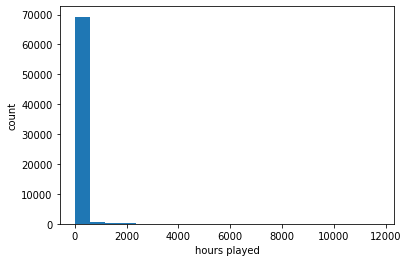

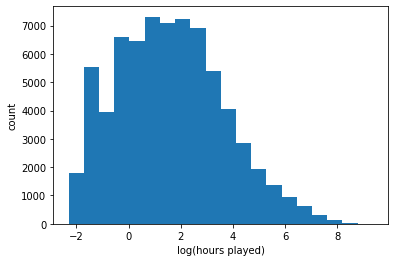

In [ ]:
plt.hist(ubyi.values.flatten(), bins=20)
plt.xlabel('hours played')
plt.ylabel('count')
plt.show()
plt.hist(np.log(ubyi.values.flatten()), bins=20)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.show()

In [ ]:
#log transform the data
ubyi_norm = np.log(ubyi)
#add the absolute value of the min value so that the data goes to an all positive scale
#this essentially turns the data into a 0 to 10 scale
ubyi_norm += abs(ubyi_norm.min().min())
print(ubyi_norm.min().min(), ubyi_norm.max().max())
#take out users that haven't rated at least 3 games
ubyi_norm = ubyi_norm[(~ubyi_norm.isnull()).sum(axis=1) >= 3]
ubyi_norm

0.0 11.674533980166641


,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,7.912057,6.768493,5.003946,4.795791,4.488636,4.442651,4.394449,4.317488,3.496508,3.332205,3.218876,2.995732,2.639057,2.564949,2.564949,2.079442,2.079442,1.791759,1.609438,1.609438,1.609438,1.609438,1.609438,1.386294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,6.363028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.774856,6.733402,5.393628,4.927254,4.624973,4.356709,4.248495,3.951244,3.871201,3.526361,3.465736,3.332205,3.258097,3.135494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,1.609438,4.317488,6.565265,NaN,NaN,NaN,2.833213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.708050,NaN,NaN,NaN,NaN,2.079442,NaN,NaN,NaN,NaN,NaN,4.077537,2.564949,NaN,NaN,NaN,1.791759,NaN,NaN,NaN,4.564348,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297811211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.615121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.094345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.499810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


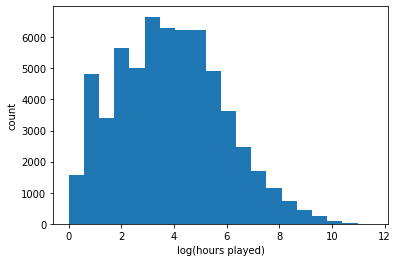

In [ ]:
plt.hist(ubyi_norm.values.flatten(), bins=20)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.show()

## Collaborative Filtering Algorithms

### 1. User-based Collaborative Filtering

In [ ]:
#construct user correlation matrix
user_corr = pd.DataFrame(index=ubyi_norm.index.values, 
                         columns=ubyi_norm.index.values)

In [ ]:
i = 0
for user1 in user_corr.index.values:
  #progress indicator
  i+=1
  if(i%50 == 0):
    print(i)
  for user2 in user_corr.columns.values:
    if user1 == user2:
      continue
    if not np.isnan(user_corr.loc[user1, user2]):
      #if the matrix value is already filled out, we don't need to calculate again
      continue
    #calculation correlation between two user vectors
    a = ubyi_norm.loc[user1].values
    b = ubyi_norm.loc[user2].values
    empty = ~np.logical_or(np.isnan(a), np.isnan(b))
    a=np.compress(empty,a)
    b=np.compress(empty,b)
    if(len(a) < 5):
      #if users have less than 5 items in common, just leave it NA
      #pearson similarity doesn't have much meaning in those cases
      continue
    corr = np.corrcoef(a,b)[0,1]
    user_corr.loc[user1,user2] = corr
    user_corr.loc[user2,user1] = corr

In [ ]:
user_corr

,151603712,59945701,53875128,26122540,297811211,218323237,126340495,97298878,173909336,92107940,48845802,226212066,65117175,236557903,11373749,54103616,298547051,264253640,164543231,163617342,49769103,202742019,109278470,92842632,5270060,171847029,64350600,93085014,180596443,92173524,151229648,56038151,148928721,46759859,257377008,189191657,57234698,9544834,32592631,57103808,...,174507916,3979930,160767652,107623882,94229851,135698781,60859695,75970863,71331921,42657809,154230723,87201181,23181958,258673767,147879598,294006204,116564064,58794630,34901647,90878103,72417734,154145611,111362598,34442062,151600301,73726855,161896440,215721461,135400225,131377772,88705345,274261412,125424716,99096740,176449171,221315846,128470551,0,1,2
151603712,NaN,NaN,0.386299,NaN,NaN,NaN,-0.131757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.381834,0.314284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605165,0.0232966,0.190747,NaN,NaN,NaN,NaN,-0.171154,NaN,0.240815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,NaN,NaN,0.0188135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0415211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61691,NaN,-0.34185,NaN,NaN,NaN,NaN,0.406374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,0.386299,0.0188135,NaN,NaN,NaN,NaN,NaN,0.447301,NaN,NaN,NaN,NaN,0.0519731,NaN,0.448739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298235,NaN,NaN,NaN,NaN,0.297207,-0.414121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.654603,...,NaN,0.736098,NaN,NaN,NaN,NaN,0.391608,NaN,NaN,0.0864206,0.359903,NaN,NaN,NaN,NaN,NaN,0.275333,NaN,0.0446122,NaN,0.403448,NaN,-0.587079,0.729169,NaN,NaN,0.561606,NaN,0.266579,NaN,NaN,NaN,NaN,0.246944,NaN,NaN,NaN,-0.33765,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.585108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297811211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128470551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,-0.33765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
user_corr.to_csv('user_corr_matrix_g.csv', index=True)

In [ ]:
user_corr = pd.read_csv('user_corr_matrix_g.csv', index_col=0)
user_corr.index = user_corr.index.map(int)
user_corr.columns = user_corr.columns.map(int)

In [ ]:
def recommend_a_game(user):
  #what game should we recommend?
  user_to_recommend = user
  user_avg = ubyi_norm.loc[user_to_recommend].mean()
  games_to_consider = ubyi_norm.loc[user_to_recommend][ubyi_norm.loc[user_to_recommend].isna()].index.values
  recommendation = None
  rec_pred_rating = -np.inf
  users_considered = None
  collab_filter_df_mem = None
  for game in games_to_consider:
    #get list of users that have played it
    played = ubyi_norm[game][ubyi_norm[game].notna()].index.values
    #print(len(played))
    #get list of users that have a similarity rating with user
    users_with_sim = user_corr[user_to_recommend][user_corr[user_to_recommend].notna()].index.values
    #print(len(users_with_sim))
    #get intersection of both lists
    played_and_sim = set(played).intersection(users_with_sim)
    #print(len(played_and_sim))
    if(len(played_and_sim) < 5):
      #cant make a rec for this game, not enough similar (or dissimilar) users have played it
      continue
    #get 5 most similar (or most dissimilar) users
    sim_tuples = []
    for user in played_and_sim:
      sim_with_user1 = user_corr.loc[user_to_recommend, user]
      sim_tuples.append((user,sim_with_user1))
    #sort sim_tuples to find 5 most similar (or dissimilar) users
    #consider up to 10 if available
    sim_tuples.sort(key=lambda x: abs(x[1]), reverse=True)
    users_to_score = [x[0] for x in sim_tuples[:min(len(sim_tuples), 10)]]
    #create dataframe to organize data
    collab_filter_df = pd.DataFrame(index=users_to_score, columns=['rating','user_avg','diff', 'corr_w_user1', 'abs(corr)', 'weight', 'weighted_diff'])
    for user in users_to_score:
      collab_filter_df.loc[user,'rating'] = ubyi_norm.loc[user,game]
      collab_filter_df.loc[user,'user_avg'] = ubyi_norm.loc[user].mean()
      collab_filter_df.loc[user,'diff'] = ubyi_norm.loc[user,game] - ubyi_norm.loc[user].mean()
      collab_filter_df.loc[user,'corr_w_user1'] = user_corr.loc[user_to_recommend,user]
      collab_filter_df.loc[user,'abs(corr)'] = abs(user_corr.loc[user_to_recommend,user])
    sum_corr = sum(collab_filter_df['abs(corr)'])
    collab_filter_df['weight'] = collab_filter_df['corr_w_user1']/sum_corr
    collab_filter_df['weighted_diff'] = collab_filter_df['weight']*collab_filter_df['diff']
    learning = sum(collab_filter_df['weighted_diff'])
    predicted_rating = user_avg + learning
    if(predicted_rating > rec_pred_rating):
      recommendation = game
      rec_pred_rating = predicted_rating
      users_considered = users_to_score
      collab_filter_df_mem = collab_filter_df
  #return max(predicted_ratings_dict, key=predicted_ratings_dict.get)
  print('We recommend {0} with a predicted rating of {1}!'.format(recommendation, rec_pred_rating))
  print('We considered the following users when making this recommendation:', users_considered)
  return collab_filter_df_mem

In [ ]:
#print(ubyi_norm.index.values[50])
tmp = recommend_a_game(1)
tmp

We recommend None with a predicted rating of -inf!
We considered the following users when making this recommendation: None


In [ ]:
ubyi_norm.loc[1][ubyi_norm.loc[1].notna()].sort_values(ascending=False)

Dota 2                           6.907755
H1Z1                             6.214608
Call of Duty Modern Warfare 2    4.605170
Name: 1, dtype: float64

Presentation examples

26122540
148510973

### 2. Item-Based Collaborative Filtering

In [ ]:
#construct user correlation matrix
item_corr = pd.DataFrame(index=ubyi_norm.columns.values, 
                         columns=ubyi_norm.columns.values)

In [ ]:
i = 0
for item1 in item_corr.index.values:
  #progress indicator
  i+=1
  if(i%50 == 0):
    print(i)
  for item2 in item_corr.columns.values:
    if item1 == item2:
      continue
    if not np.isnan(item_corr.loc[item1, item2]):
      #if the matrix value is already filled out, we don't need to calculate again
      continue
    #calculation correlation between two item vectors
    a = ubyi_norm[item1].values
    b = ubyi_norm[item2].values
    empty = ~np.logical_or(np.isnan(a), np.isnan(b))
    a=np.compress(empty,a)
    b=np.compress(empty,b)
    if(len(a) < 10):
      #if items have less than 50 items in common, just leave it NA
      #pearson similarity doesn't have much meaning in those cases
      continue
    corr = np.corrcoef(a,b)[0,1]
    item_corr.loc[item1,item2] = corr
    item_corr.loc[item2,item1] = corr

50
100
150
200
250
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600


In [ ]:
item_corr

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
The Elder Scrolls V Skyrim,NaN,0.0807705,0.16158,0.344387,0.0925701,-0.121787,0.031917,NaN,0.267262,0.134024,0.349892,0.371969,0.254778,0.2878,0.145199,0.127076,-0.268765,0.030425,-0.191223,0.0931048,NaN,-0.0947676,0.204066,-0.00209783,0.0135486,NaN,0.108839,0.377944,0.187927,0.257234,-0.189764,0.113309,NaN,0.293847,0.122203,0.123869,0.127081,0.121819,-0.224047,-0.0303803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fallout 4,0.0807705,NaN,0.274412,-0.0206286,0.0026745,NaN,0.538123,NaN,-0.113213,-0.0304877,-0.142765,NaN,0.108036,0.229007,-0.0970584,0.0885699,NaN,0.185082,-0.846879,NaN,NaN,0.389142,0.174564,0.197468,-0.149042,NaN,NaN,NaN,0.0414865,-0.01057,NaN,0.119405,NaN,0.427307,0.487683,0.137913,0.356035,-0.105765,NaN,-0.19621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spore,0.16158,0.274412,NaN,-0.0815006,0.188447,NaN,NaN,NaN,-0.261945,0.0253273,NaN,NaN,NaN,0.234034,NaN,NaN,NaN,0.00981452,-0.0117705,NaN,NaN,0.0400097,NaN,-0.0852497,0.285396,NaN,NaN,NaN,0.264313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.178053,NaN,-0.00341757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fallout New Vegas,0.344387,-0.0206286,-0.0815006,NaN,-0.0333096,NaN,0.0995732,NaN,-0.0319391,0.037129,0.201008,0.482888,0.23758,0.246087,0.387789,0.00219931,0.478458,0.272513,-0.143336,0.366396,NaN,-0.00973224,0.213316,-0.10532,0.0321839,NaN,-0.298319,NaN,0.23033,0.499194,NaN,0.322322,NaN,0.315061,0.321535,0.134565,0.166903,0.324891,NaN,-0.0337747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Left 4 Dead 2,0.0925701,0.0026745,0.188447,-0.0333096,NaN,NaN,0.162879,NaN,0.516372,0.23429,0.121151,0.228009,0.207417,0.0252051,0.0673828,0.102493,0.344169,0.207442,0.446028,-0.0496676,NaN,0.00382694,0.114327,0.129654,0.0654932,NaN,0.0796486,NaN,0.0186749,-0.0382982,0.260683,-0.22867,NaN,0.288794,0.120506,0.198728,-0.118668,0.18094,-0.0465203,0.0604605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
item_corr.to_csv('item_corr_matrix.csv', index=True)

In [ ]:
item_corr = pd.read_csv('item_corr_matrix.csv', index_col=0)

In [ ]:
def recommend_a_game2(user):
  #what game should we recommend?
  user_to_recommend = user
  user_avg = ubyi_norm.loc[user_to_recommend].mean()
  games_to_consider = ubyi_norm.loc[user_to_recommend][ubyi_norm.loc[user_to_recommend].isna()].index.values
  recommendation = None
  rec_pred_rating = -np.inf
  users_considered = None
  collab_filter_df_mem = None
  for game in games_to_consider:
    #get list of games that user has played
    played = pd.DataFrame(ubyi_norm.loc[user][ubyi_norm.loc[user].notna()])
    played.reset_index(inplace=True)
    played.columns = ['game', 'user_rating']
    played['user_avg'] = user_avg
    played['diff'] = played['user_rating'] - played['user_avg']
    tmp_str = 'correlation_w_' + str(game)
    played[tmp_str] = played['game'].map(lambda x: item_corr.loc[x,game])
    played['abs_corr'] = played[tmp_str].map(abs)
    sum_corr = played['abs_corr'].sum()
    played['weight'] = played[tmp_str]/sum_corr
    played['weighted_diff'] = played['weight']*played['diff']
    learning = played['weighted_diff'].sum()
    predicted_rating = user_avg + learning
    #print(played.head())
    if(played['weighted_diff'].notna().sum() < len(played)/4):
      #not really meaningful if only a few games is correlated with target
      #set threshold at 25% of games
      continue
    if(predicted_rating > rec_pred_rating):
      recommendation = game
      rec_pred_rating = predicted_rating
      collab_filter_df_mem = played
  print('We recommend {0} with a predicted rating of {1}!'.format(recommendation, rec_pred_rating))
  return collab_filter_df_mem

In [ ]:
tmp = recommend_a_game2(148510973)
tmp

We recommend Medieval II Total War Kingdoms with a predicted rating of 7.608371705064537!


,game,user_rating,user_avg,diff,correlation_w_Medieval II Total War Kingdoms,abs_corr,weight,weighted_diff
0,The Elder Scrolls V Skyrim,6.593045,4.082735,2.510310,0.633011,0.633011,0.524330,1.316231
1,Left 4 Dead 2,3.178054,4.082735,-0.904681,NaN,NaN,NaN,NaN
2,Team Fortress 2,6.620073,4.082735,2.537339,-0.035427,0.035427,-0.029345,-0.074457
3,Counter-Strike Global Offensive,8.492900,4.082735,4.410166,0.019438,0.019438,0.016101,0.071008
4,Rocket League,1.945910,4.082735,-2.136825,NaN,NaN,NaN,NaN
5,Portal 2,1.791759,4.082735,-2.290975,NaN,NaN,NaN,NaN
6,Middle-earth Shadow of Mordor,5.393628,4.082735,1.310893,NaN,NaN,NaN,NaN
7,Assassin's Creed III,3.367296,4.082735,-0.715439,NaN,NaN,NaN,NaN
8,Unturned,4.094345,4.082735,0.011610,NaN,NaN,NaN,NaN
9,Rust,2.708050,4.082735,-1.374684,NaN,NaN,NaN,NaN


In [ ]:
tmp[tmp['weight'].notna()]

,game,user_rating,user_avg,diff,correlation_w_Medieval II Total War Kingdoms,abs_corr,weight,weighted_diff
0,The Elder Scrolls V Skyrim,6.593045,4.082735,2.510310,0.633011,0.633011,0.524330,1.316231
2,Team Fortress 2,6.620073,4.082735,2.537339,-0.035427,0.035427,-0.029345,-0.074457
3,Counter-Strike Global Offensive,8.492900,4.082735,4.410166,0.019438,0.019438,0.016101,0.071008
12,Mount & Blade Warband,9.264829,4.082735,5.182094,0.516373,0.516373,0.427718,2.216474
14,Chivalry Medieval Warfare,2.639057,4.082735,-1.443677,0.003026,0.003026,0.002507,-0.003619


In [ ]:
ubyi_norm.loc[53875128][ubyi_norm.loc[53875128].notna()]

Spore                             1.609438
Fallout New Vegas                 4.317488
Left 4 Dead 2                     6.565265
Left 4 Dead                       2.833213
Grand Theft Auto IV               2.708050
                                    ...   
Metro Last Light Redux            0.000000
Crimzon Clover  WORLD IGNITION    0.000000
Sonic Generations                 0.000000
Ethan Meteor Hunter               0.000000
Reus                              0.000000
Name: 53875128, Length: 197, dtype: float64

## Matrix Factorization Algorithm

inspiration for below code:
https://ethen8181.github.io/machine-learning/recsys/1_ALSWR.html

In [ ]:
from sklearn.metrics import mean_squared_error
class ExplicitMF:
    """
    Train a matrix factorization model using Alternating Least Squares
    to predict empty entries in a matrix
    
    Parameters
    ----------
    n_iters : int
        number of iterations to train the algorithm
        
    n_factors : int
        number of latent factors to use in matrix 
        factorization model, some machine-learning libraries
        denote this as rank
        
    reg : float
        regularization term for item/user latent factors,
        since lambda is a keyword in python we use reg instead
    """

    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors  
        
    def fit(self, train):
        """
        pass in training and testing at the same time to record
        model convergence, assuming both dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))

        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train, self.user_factors, self.item_factors)
            self.item_factors = self._als_step(train.T, self.item_factors, self.user_factors) 
            predictions = self.predict()
            train_mse = self.compute_mse(train, predictions)
            self.train_mse_record.append(train_mse)
        
        return self    
    
    def _als_step(self, ratings, solve_vecs, fixed_vecs):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs
    
    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred
    
    @staticmethod
    def compute_mse(y_true, y_pred):
        """ignore zero terms prior to comparing the mse"""
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse

In [ ]:
def plot_learning_curve(model):
    """visualize the training/testing loss"""
    linewidth = 3
    plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()

In [ ]:
ubyi_norm_0 = ubyi_norm.fillna(0)

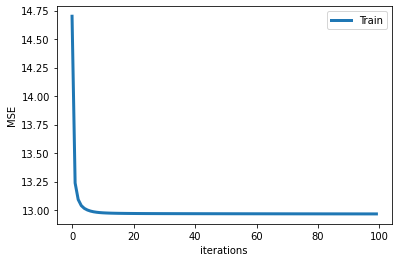

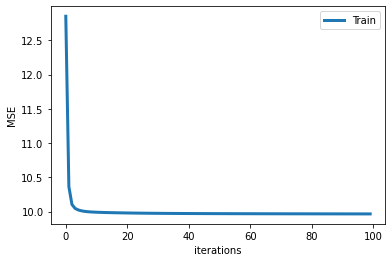

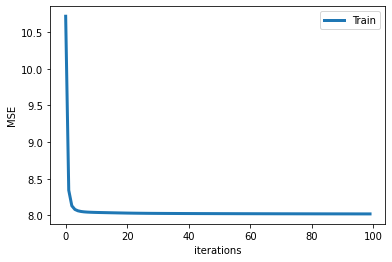

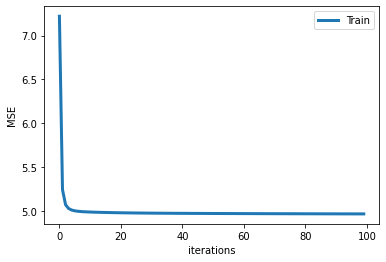

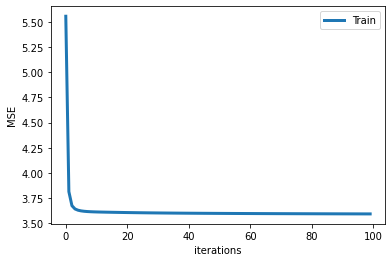

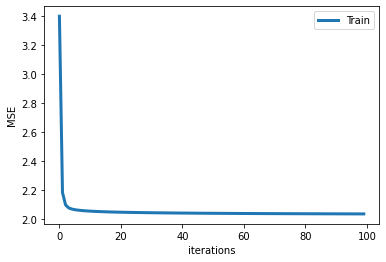

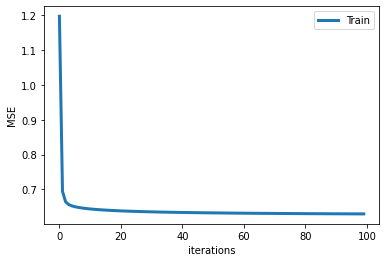

In [ ]:
als_min_history = []
for i in [5,20,40,100,150,250,500]:
  als = ExplicitMF(n_iters = 100, n_factors = i, reg = 0.01)
  als.fit(ubyi_norm_0.to_numpy())
  plot_learning_curve(als)
  als_min_history.append(min(als.train_mse_record))

Text(0, 0.5, 'MSE')

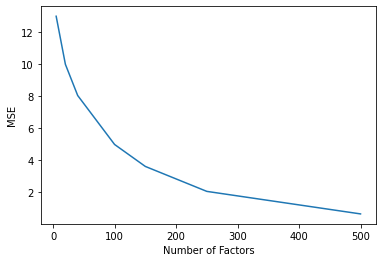

In [ ]:
plt.plot([5,20,40,100,150,250,500], als_min_history)
plt.xlabel('Number of Factors')
plt.ylabel('MSE')

In [ ]:
als = ExplicitMF(n_iters = 100, n_factors = 25, reg = 0.01)
als.fit(ubyi_norm_0.to_numpy())

In [ ]:
lf_prod = np.matmul(als.user_factors, als.item_factors.T)

In [ ]:
ubyi_mf = pd.DataFrame(lf_prod, index=ubyi_norm.index.values, columns=ubyi_norm.columns.values)
ubyi_mf

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,Tomb Raider,The Banner Saga,Dead Island Epidemic,BioShock Infinite,Dragon Age Origins - Ultimate Edition,Fallout 3 - Game of the Year Edition,SEGA Genesis & Mega Drive Classics,Grand Theft Auto IV,Realm of the Mad God,Marvel Heroes 2015,Eldevin,Dota 2,BioShock,Robocraft,Garry's Mod,Jazzpunk,Ultra Street Fighter IV,FINAL FANTASY XIII,Sid Meier's Civilization V,L.A. Noire,Company of Heroes Tales of Valor,7 Days to Die,Divekick,FINAL FANTASY VII,Orcs Must Die! 2,Killing Floor,Company of Heroes,Bastion,Undertale,Counter-Strike Global Offensive,...,Drakensang The River of Time,Jacob Jones and the Bigfoot Mystery Episode 2,Battle Brothers,Maszyny Rolnicze 2015,Strong Bad Episode 3 Baddest of the Bands,Strong Bad Episode 2 Strong Badia the Free,Strong Bad Episode 4 Dangeresque 3,BIT.TRIP VOID,BIT.TRIP CORE,Parcel,Nancy Drew The Haunted Carousel,Abandoned Chestnut Lodge Asylum,Hector Ep 2,The Otherside,Drawn The Painted Tower,Fire,Kuros,Back to Bed,Nancy Drew The Creature of Kapu Cave,Legend of Fae,Hotel Dash,Diner Dash Hometown Hero,DinerTown Tycoon,Worldwide Soccer Manager 2009,MLB 2K10,MLB 2K11,Out of the Park Baseball 14,Kohan II Kings of War,The Impossible Game,Khet 2.0,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,8.211332,1.977374,0.297036,3.176999,4.360367,0.150912,0.229629,0.029250,1.219698,3.017365,0.738521,0.110130,-0.001142,1.114188,0.311744,0.583871,0.053202,0.330156,0.021230,0.184494,0.030371,1.581869,0.520656,0.087775,0.167245,-0.083822,0.131133,0.096274,0.119173,0.200702,0.028923,0.524733,-0.016839,0.189039,-0.041027,0.767035,0.068629,0.204004,0.122245,0.165029,...,0.011334,0.003253,0.013134,0.0,-0.021864,-0.020792,-0.015127,-0.008746,0.0,-0.002041,-0.001840,-0.001825,-0.001766,-0.001747,-0.001654,-0.001550,-0.001453,-0.001251,-0.001251,-0.000496,-0.000126,-0.000110,-0.000064,0.028528,0.027608,0.024906,0.024770,0.011196,-0.009830,-0.005824,-0.002173,0.0,-0.000811,-0.000288,0.000796,-0.009824,-0.007047,-0.006763,-0.003993,-0.003677
59945701,5.992178,-0.097957,0.180000,1.115580,0.627330,0.082113,0.354938,0.033485,0.244026,0.048447,0.275987,-0.001022,-0.006936,0.222995,0.250647,0.273413,0.025933,0.557538,0.043969,0.104541,-0.002161,0.170622,0.206984,-0.021204,-0.021681,0.010253,0.063491,0.071697,4.589567,0.130959,-0.020509,0.192715,0.052721,0.187146,0.110825,0.363682,0.021853,0.210124,0.035119,2.987941,...,0.006949,0.001748,0.013064,0.0,-0.005238,-0.004981,-0.003624,-0.002095,0.0,-0.011038,-0.009954,-0.009870,-0.009550,-0.009450,-0.008943,-0.008383,-0.007858,-0.006768,-0.006768,-0.002682,-0.000902,-0.000788,-0.000462,-0.014389,-0.013925,-0.012562,-0.012494,-0.005647,-0.002969,-0.001759,-0.000656,0.0,-0.000130,-0.000046,0.000415,-0.008352,-0.005991,-0.005750,-0.003395,-0.003126
53875128,-0.567650,3.300806,0.204305,3.729764,4.241207,0.017090,-1.067431,-0.037177,3.007485,-0.247360,3.140490,0.405940,0.134868,4.237901,0.689728,1.446593,0.128684,4.990461,-0.092557,-0.137747,-0.043709,-0.195911,2.285690,-0.377663,-0.087502,0.110126,0.485340,0.195899,4.499740,1.801351,0.040111,-0.317424,-0.001676,0.469423,0.599456,1.872074,0.807398,2.214435,0.055917,0.609668,...,-0.008357,-0.003826,0.008034,0.0,0.047617,0.045283,0.032946,0.019047,0.0,0.007796,0.007030,0.006971,0.006745,0.006675,0.006317,0.005921,0.005550,0.004780,0.004780,0.001894,-0.000286,-0.000250,-0.000146,0.119026,0.115188,0.103917,0.103350,0.046712,0.005157,0.003055,0.001140,0.0,0.007787,0.002768,-0.001229,-0.004274,-0.003066,-0.002943,-0.001737,-0.001600
26122540,0.154147,0.009801,-0.099855,-0.660854,-0.030533,-0.053836,0.535913,-0.006557,0.576836,-0.018803,-0.019134,-0.038001,0.166929,-0.242036,-0.089433,-0.220809,-0.026416,-0.241726,0.073274,-0.036622,-0.00

In [ ]:
def recommend_a_game3(user):
  games_to_consider = ubyi_norm.loc[user][ubyi_norm.loc[user].isna()].index.values
  print('We recommend:')
  top5 = ubyi_mf.loc[1, games_to_consider].sort_values(ascending=False)[:5].index.values
  for idx, game in enumerate(top5):
    print('{0}: {1}'.format(idx+1, game))

In [ ]:
recommend_a_game3(0)
# 26122540 148510973

We recommend:
1: Dota 2
2: Call of Duty Modern Warfare 2 - Multiplayer
3: Call of Duty Modern Warfare 2
4: Call of Duty Black Ops - Multiplayer
5: Call of Duty Black Ops
